In [2]:
import numpy as np
from importlib import reload 
import os
import io
import glob
import pyensae
from PIL import Image
import pandas as pd
from PIL import ImageFont
from PIL import ImageDraw

In [3]:
from blockdiag.utils.fontmap import FontMap
from blockdiag.utils.fontmap import parse_fontpath
from pyensae.graphhelper import draw_diagram
import blockdiag
import pyensae

c:\users\dearanj2\appdata\local\programs\python\python36\lib\site-packages\pyensae\graphhelper\corrplot.py:19: UserWarning: corrplot.py requires scipy.
  warnings.warn("corrplot.py requires scipy.")


In [1]:
draw_diagram("""
{
//default settings'documentation:
// http://blockdiag.com/en/blockdiag/attributes/diagram.attributes.html?highlight=default#blockdiag_diagram_attr-default_fontsize

   orientation = portrait
        1 -> 2; 1 [label = "sdsadsd s \n dsd \% adsdd dsad"]
        2 -- 3;
        3 -- 4;   
        4 -> 5;
        5 -> 6; 
        6 -- 7;
        5 -> 8;
        4 -- 9;
        2 -- 10;
        2 -- 11;
        2 -> 9;
        
    //define default node sizes
        node_width =130;
        node_height = 50;
        
     // set default colors
  default_node_color = "#d3d3d3";
  default_group_color = "#7777FF";
  default_linecolor = black;

      1 [color  = "#008080"];
      
    
      group {
          label = "Third group";
          color = "#7777FF";

          // Set group shape to 'line group' (default is box)
          shape = line;

          // Set line style (effects to 'line group' only)
          style = dashed;

           6 -> 8 ->7;
      }

          
}""",format='pillow')

NameError: name 'draw_diagram' is not defined

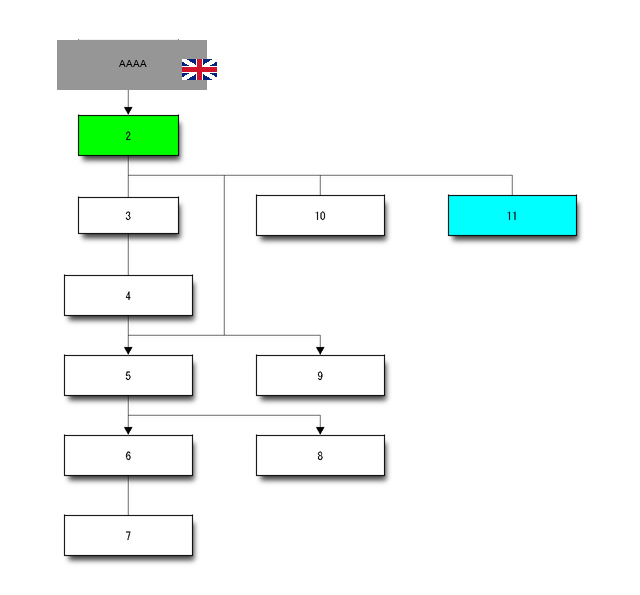

In [70]:
block_diagram_PIL = draw_diagram("""
{
   orientation = portrait
        1 -> 2;
        2 -- 3;
        3 -- 4;   
        4 -> 5;
        5 -> 6; 
        6 -- 7;
        5 -> 8;
        4 -- 9;
        2 -- 10;
        2 -- 11;
        2 -> 9;
        
    1 [height = 35];
    1 [width = 100]; 
    2 [height = 40];
    2 [width = 100]
    3 [height = 35];
    3 [width = 100]
        

      1 [color  = "#ff0000"];
      2 [color  = "#00ff00"];
      11 [color  = "#00ffff"];
      
          
}""",format='pillow')
block_diagram_array=np.array(block_diagram_PIL)

# drawing the gray box used for all cells
box_height=50
box_width=150

gray_box=np.zeros((box_height,box_width,3))+(150,150,150)
gray_box=Image.fromarray(gray_box.astype('uint8'))

draw = ImageDraw.Draw(gray_box)
font = ImageFont.truetype('arial.ttf', 10)
draw.text((62,17),'AAAA',(0,0,0),font=font)

# pasting the above box on the BlockDiag output image where the block with color '#ff0000' resides

hex_label='#ff0000'
# converting hex string to rgb
rgb=tuple(int(hex_label.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))
# resizing the gray box
gray_box.thumbnail((190,55), Image.ANTIALIAS)
box_idx=np.where(np.multiply(block_diagram_array[:,:,0]==rgb[0],
                             block_diagram_array[:,:,1]==rgb[1],
                             block_diagram_array[:,:,2]==rgb[2]))
x_coordinate=int(np.min(box_idx[1]))
y_coordinate=int(np.min(box_idx[0]))
block_diagram_PIL.paste(gray_box, (x_coordinate-25,y_coordinate-4))

# pasting the flag picture
flag_img = Image.open('britain_flag.png', 'r')
flag_img.thumbnail((35,35), Image.ANTIALIAS) # resizing the flag
block_diagram_PIL.paste(flag_img, (x_coordinate+100,y_coordinate+15))

#block_diagram_PIL.save('output.png')
block_diagram_PIL